# Funnel Analysis

In [52]:
# set-up stage

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Corporate Styling

In [53]:
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

print("Everything is fine")

Everything is fine


### Loading Dataset

In [76]:
df = pd.read_csv("funnel_dataset.csv")

### Basic Steps

In [55]:
print("Top 5 rows\n")
df.head()

Top 5 rows



,User_ID,Session_ID,Event,Timestamp,Device,Region,Channel,Product_Category,Revenue,Bounce_Flag
0,USR00001,SES00001,Browse,28-10-2025 07:33,Desktop,West,Organic,Home,0.0,Yes
1,USR00001,SES00001,Add to Cart,28-10-2025 07:36,Tablet,East,Social Media,Beauty,0.0,Yes
2,USR00001,SES00001,Checkout,28-10-2025 07:40,Mobile,West,Email,Beauty,0.0,Yes
3,USR00002,SES00002,Browse,19-10-2025 09:15,Desktop,East,Email,Electronics,0.0,No
4,USR00002,SES00002,Add to Cart,19-10-2025 09:18,Mobile,West,Social Media,Fashion,0.0,No


In [56]:
print("last 5 rows\n")
df.tail()

last 5 rows



,User_ID,Session_ID,Event,Timestamp,Device,Region,Channel,Product_Category,Revenue,Bounce_Flag
21658,USR09999,SES09999,Browse,03-10-2025 17:22,Desktop,South,Google Ads,Electronics,0.00,No
21659,USR09999,SES09999,Add to Cart,03-10-2025 17:26,Tablet,West,Social Media,Fashion,0.00,No
21660,USR09999,SES09999,Checkout,03-10-2025 17:29,Mobile,North,Email,Fashion,0.00,No
21661,USR09999,SES09999,Purchase,03-10-2025 17:34,Mobile,East,Email,Fashion,960.65,No
21662,USR10000,SES10000,Browse,15-10-2025 20:32,Mobile,South,Google Ads,Beauty,0.00,Yes


In [57]:
print("Randomly selected row\n")
df.sample()

Randomly selected row



,User_ID,Session_ID,Event,Timestamp,Device,Region,Channel,Product_Category,Revenue,Bounce_Flag
7294,USR03388,SES03388,Browse,18-10-2025 01:08,Tablet,East,Organic,Home,0.0,Yes


In [58]:
# All column names, total number of columns

print(df.columns)
print(f"\nTotal number of columns: {df.columns.nunique()}")

Index(['User_ID', 'Session_ID', 'Event', 'Timestamp', 'Device', 'Region',
       'Channel', 'Product_Category', 'Revenue', 'Bounce_Flag'],
      dtype='str')

Total number of columns: 10


In [59]:
# type of dataset

type(df)

pandas.DataFrame

In [60]:
# data type of all columns

df.dtypes

User_ID                 str
Session_ID              str
Event                   str
Timestamp               str
Device                  str
Region                  str
Channel                 str
Product_Category        str
Revenue             float64
Bounce_Flag             str
dtype: object

In [61]:
# timestamp column must be in date time format

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print(df.dtypes)

User_ID                        str
Session_ID                     str
Event                          str
Timestamp           datetime64[us]
Device                         str
Region                         str
Channel                        str
Product_Category               str
Revenue                    float64
Bounce_Flag                    str
dtype: object


C:\Users\Aman\AppData\Local\Temp\ipykernel_32180\1476274748.py:3: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [62]:
# info about all the columns

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 21663 entries, 0 to 21662
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   User_ID           21663 non-null  str           
 1   Session_ID        21663 non-null  str           
 2   Event             21663 non-null  str           
 3   Timestamp         21663 non-null  datetime64[us]
 4   Device            21663 non-null  str           
 5   Region            21663 non-null  str           
 6   Channel           21663 non-null  str           
 7   Product_Category  21663 non-null  str           
 8   Revenue           21663 non-null  float64       
 9   Bounce_Flag       21663 non-null  str           
dtypes: datetime64[us](1), float64(1), str(8)
memory usage: 1.7 MB


In [63]:
# imp information about dataset's numeric columns

df.describe()

,Timestamp,Revenue
count,21663,21663.000000
mean,2025-10-16 19:55:53.300096,54.304841
min,2025-10-01 19:30:00,0.000000
25%,2025-10-09 08:31:00,0.000000
50%,2025-10-16 19:47:00,0.000000
75%,2025-10-24 08:12:30,0.000000
max,2025-10-31 19:25:00,1998.510000
std,NaN,262.692471


In [64]:
# imp info about all the columns

df.describe(include='object')

C:\Users\Aman\AppData\Local\Temp\ipykernel_32180\3431923375.py:3: Pandas4Warning:

For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.



,User_ID,Session_ID,Event,Device,Region,Channel,Product_Category,Bounce_Flag
count,21663,21663,21663,21663,21663,21663,21663,21663
unique,10000,10000,4,3,4,4,5,2
top,USR00002,SES00002,Browse,Tablet,West,Google Ads,Electronics,Yes
freq,4,4,10000,7237,5462,5435,4405,17343


In [65]:
# shape of dataset

df.shape

(21663, 10)

In [66]:
pd.set_option("display.max_rows", None)

### Data Pre-processing and Cleaning

In [67]:
# check for null and duplicate values

print("\n---Null Values---\n")
null_values = df.isnull().sum()
print(null_values)

print("\n---Duplicate Values---\n")
duplicate_values = df.duplicated().sum()
print(f"Total numbers of duplicate values in this dataset is {duplicate_values}")

print("\n---Unique Data---\n")
unique_data = df.nunique()
print(unique_data)


---Null Values---

User_ID             0
Session_ID          0
Event               0
Timestamp           0
Device              0
Region              0
Channel             0
Product_Category    0
Revenue             0
Bounce_Flag         0
dtype: int64

---Duplicate Values---

Total numbers of duplicate values in this dataset is 0

---Unique Data---

User_ID             10000
Session_ID          10000
Event                   4
Timestamp           16989
Device                  3
Region                  4
Channel                 4
Product_Category        5
Revenue              1078
Bounce_Flag             2
dtype: int64


In [68]:
# fixing the data and extracting time based data
# Creating multiple values for deep analysis

df['Date'] = df['Timestamp'].dt.date
df['DayOfWeek'] = df['Timestamp'].dt.day_name()
df['Hour'] = df['Timestamp'].dt.hour
df['WeekNumber'] = df['Timestamp'].dt.isocalendar().week

In [69]:
df.sample()

,User_ID,Session_ID,Event,Timestamp,Device,Region,Channel,Product_Category,Revenue,Bounce_Flag,Date,DayOfWeek,Hour,WeekNumber
18165,USR08373,SES08373,Checkout,2025-10-19 06:13:00,Tablet,West,Email,Beauty,0.0,Yes,2025-10-19,Sunday,6,42


In [70]:
df['Event_sequence'] = df.groupby('Session_ID').cumcount() + 1

In [71]:
df.head()

,User_ID,Session_ID,Event,Timestamp,Device,Region,Channel,Product_Category,Revenue,Bounce_Flag,Date,DayOfWeek,Hour,WeekNumber,Event_sequence
0,USR00001,SES00001,Browse,2025-10-28 07:33:00,Desktop,West,Organic,Home,0.0,Yes,2025-10-28,Tuesday,7,44,1
1,USR00001,SES00001,Add to Cart,2025-10-28 07:36:00,Tablet,East,Social Media,Beauty,0.0,Yes,2025-10-28,Tuesday,7,44,2
2,USR00001,SES00001,Checkout,2025-10-28 07:40:00,Mobile,West,Email,Beauty,0.0,Yes,2025-10-28,Tuesday,7,44,3
3,USR00002,SES00002,Browse,2025-10-19 09:15:00,Desktop,East,Email,Electronics,0.0,No,2025-10-19,Sunday,9,42,1
4,USR00002,SES00002,Add to Cart,2025-10-19 09:18:00,Mobile,West,Social Media,Fashion,0.0,No,2025-10-19,Sunday,9,42,2


In [72]:
# Basic steps

print(f'Total User ID {df['User_ID'].nunique()}')
print(f'\nTotal Session ID {df['Session_ID'].nunique()}')
print(f'\nDate range {df['Date'].min()} to {df['Date'].max()}')

Total User ID 10000

Total Session ID 10000

Date range 2025-10-01 to 2025-10-31


## Funnel Stage Definition and Session-Level Aggregation

In [73]:
# Defining funnel stages in order
funnel_stages = ['Browse', 'Add to Cart', 'Checkout', 'Purchase']

# Creating session-level summary
session_summary = df.groupby('Session_ID').agg({
    'User_ID': 'first',
    'Timestamp': ['min', 'max'],
    'Event': lambda x: list(x),
    'Device': 'first',
    'Region': 'first',
    'Channel': 'first',
    'Product_Category': 'first',
    'Revenue': 'max',
    'Bounce_Flag': 'first'
}).reset_index()

# Flattening column names
session_summary.columns = ['Session_ID', 'User_ID', 'Session_Start', 'Session_End', 
                           'Event_Sequence', 'Device', 'Region', 'Channel', 
                           'Product_Category', 'Revenue', 'Bounce_Flag']

# Calculating session duration in minutes
session_summary['Session_Duration_Min'] = (
    session_summary['Session_End'] - session_summary['Session_Start']
).dt.total_seconds() / 60

# Identify maximum funnel stage reached for each session
def get_max_funnel_stage(events):
    stage_values = {stage: i for i, stage in enumerate(funnel_stages)}
    max_stage_index = -1
    for event in events:
        if event in stage_values and stage_values[event] > max_stage_index:
            max_stage_index = stage_values[event]
    return funnel_stages[max_stage_index] if max_stage_index != -1 else 'Browse'

session_summary['Max_Funnel_Stage'] = session_summary['Event_Sequence'].apply(get_max_funnel_stage)

print("📈 Session Summary Created:")
display(session_summary.head())

📈 Session Summary Created:


,Session_ID,User_ID,Session_Start,Session_End,Event_Sequence,Device,Region,Channel,Product_Category,Revenue,Bounce_Flag,Session_Duration_Min,Max_Funnel_Stage
0,SES00001,USR00001,2025-10-28 07:33:00,2025-10-28 07:40:00,"[Browse, Add to Cart, Checkout]",Desktop,West,Organic,Home,0.00,Yes,7.0,Checkout
1,SES00002,USR00002,2025-10-19 09:15:00,2025-10-19 09:27:00,"[Browse, Add to Cart, Checkout, Purchase]",Desktop,East,Email,Electronics,448.18,No,12.0,Purchase
2,SES00003,USR00003,2025-10-12 02:19:00,2025-10-12 02:29:00,"[Browse, Add to Cart, Checkout, Purchase]",Desktop,East,Google Ads,Beauty,1437.19,No,10.0,Purchase
3,SES00004,USR00004,2025-10-05 17:55:00,2025-10-05 17:55:00,[Browse],Tablet,West,Social Media,Home,0.00,Yes,0.0,Browse
4,SES00005,USR00005,2025-10-19 12:35:00,2025-10-19 12:37:00,"[Browse, Add to Cart]",Tablet,West,Google Ads,Electronics,0.00,Yes,2.0,Add to Cart


## Overall Funnel Analysis

In [74]:
# Calculating overall funnel metrics

funnel_metrics = []
for i, stage in enumerate(funnel_stages):
    if i == 0:
        # For Browse stage, counting all sessions
        count = len(session_summary)
    else:
        # For other stages
        count = len(session_summary[session_summary['Max_Funnel_Stage'].isin(funnel_stages[i:])])

    funnel_metrics.append({
        'Stage': stage,
        'Sessions': count,
        'Stage_Order': i
    })

funnel_df = pd.DataFrame(funnel_metrics)

# Calculating converion rates
funnel_df['Conversion_Rate'] = (funnel_df['Sessions'] / funnel_df['Sessions'].iloc[0] * 100).round(2)
funnel_df['Drop_Off_Rate'] = (1 - funnel_df['Sessions'] / funnel_df['Sessions'].shift(1)) * 100
funnel_df.loc[0, 'Drop_Off_Rate'] = 0
funnel_df['Drop_Off_Rate'] = funnel_df['Drop_Off_Rate'].round(2)

print("🎯 Overall Funnel Analysis:")
display(funnel_df)

# Revenue analysis
revenue_stats = session_summary[session_summary['Max_Funnel_Stage'] == 'Purchase'].agg({
    'Revenue': ['sum', 'mean', 'count']
}).round(2)

print("\n 💵 Revenue Analysis:")
print(f"Total Revenue: ${revenue_stats.iloc[0,0]:,.2f}")
print(f"Average Order Value: ${revenue_stats.iloc[1,0]:,.2f}")
print(f"Total Orders: {revenue_stats.iloc[2,0]:,}")

🎯 Overall Funnel Analysis:


,Stage,Sessions,Stage_Order,Conversion_Rate,Drop_Off_Rate
0,Browse,10000,0,100.00,0.00
1,Add to Cart,7059,1,70.59,29.41
2,Checkout,3524,2,35.24,50.08
3,Purchase,1080,3,10.80,69.35



 💵 Revenue Analysis:
Total Revenue: $1,176,405.78
Average Order Value: $1,089.26
Total Orders: 1,080.0


## Visualization

In [75]:
# Creating comprehensive visualizations

fig = make_subplots(
    rows = 2, cols = 2,
    subplot_titles = ('Funnel Conversion Rates', 'Stage-to-Stage Drop-off',
                      'Revenue by Funnel Stage', 'Session Duration by Stage'),
)

# Funnel conversion rates
fig.add_trace(
    go.Bar(x = funnel_df['Stage'], y = funnel_df['Sessions'],
           text = funnel_df['Sessions'], textposition = 'auto',
           name = 'Sessions', marker_color = 'lightblue'),
    row = 1, col = 1
)

# Drop-off rates
fig.add_trace(
    go.Scatter(x = funnel_df['Stage'], y = funnel_df['Drop_Off_Rate'],
               mode = 'lines+markers+text', text = funnel_df['Drop_Off_Rate'],
               textposition = 'top center', name = 'Drop-off Rate (%)',
               line = dict(color = 'red', width = 3)),
    row = 1, col = 2
)

# Revenue by stage
revenue_by_stage = session_summary.groupby('Max_Funnel_Stage')['Revenue'].sum().reset_index()
fig.add_trace(
    go.Bar(x = revenue_by_stage['Max_Funnel_Stage'], y = revenue_by_stage['Revenue'],
           text = [f'${x:,.0f}' for x in revenue_by_stage['Revenue']],
           textposition = 'auto', name = 'Revenue', marker_color = 'green'),
        row = 2, col = 1
)

# Session duration by stage
duration_by_stage = session_summary.groupby('Max_Funnel_Stage')['Session_Duration_Min'].mean().reset_index()
fig.add_trace(
    go.Bar(x = duration_by_stage['Max_Funnel_Stage'], y = duration_by_stage['Session_Duration_Min'],
           text = duration_by_stage['Session_Duration_Min'].round(2),
           textposition = 'auto', name = 'Avg Session Duration (min)',
           marker_color = 'orange'),
    row = 2, col = 2
)

fig.update_layout(height = 800, title_text = "Comprehensive Funnel Analysis Dashboard", showlegend = False)
fig.show()

## Channel Performance Analysis

📊 Channel Performance Analysis:


,Channel,Total_Sessions,Browse_Sessions,Browse_Rate,Add to Cart_Sessions,Add to Cart_Rate,Checkout_Sessions,Checkout_Rate,Purchase_Sessions,Purchase_Rate,Total_Revenue,AOV,Conversion_Rate
0,Organic,2511,2511,100.0,1802,71.76,900,35.84,281,11.19,307448.35,1094.12,11.19
1,Social Media,2440,2440,100.0,1734,71.07,861,35.29,263,10.78,280071.63,1064.91,10.78
2,Email,2489,2489,100.0,1740,69.91,877,35.24,254,10.20,276116.54,1087.07,10.20
3,Google Ads,2560,2560,100.0,1783,69.65,886,34.61,282,11.02,312769.26,1109.11,11.02


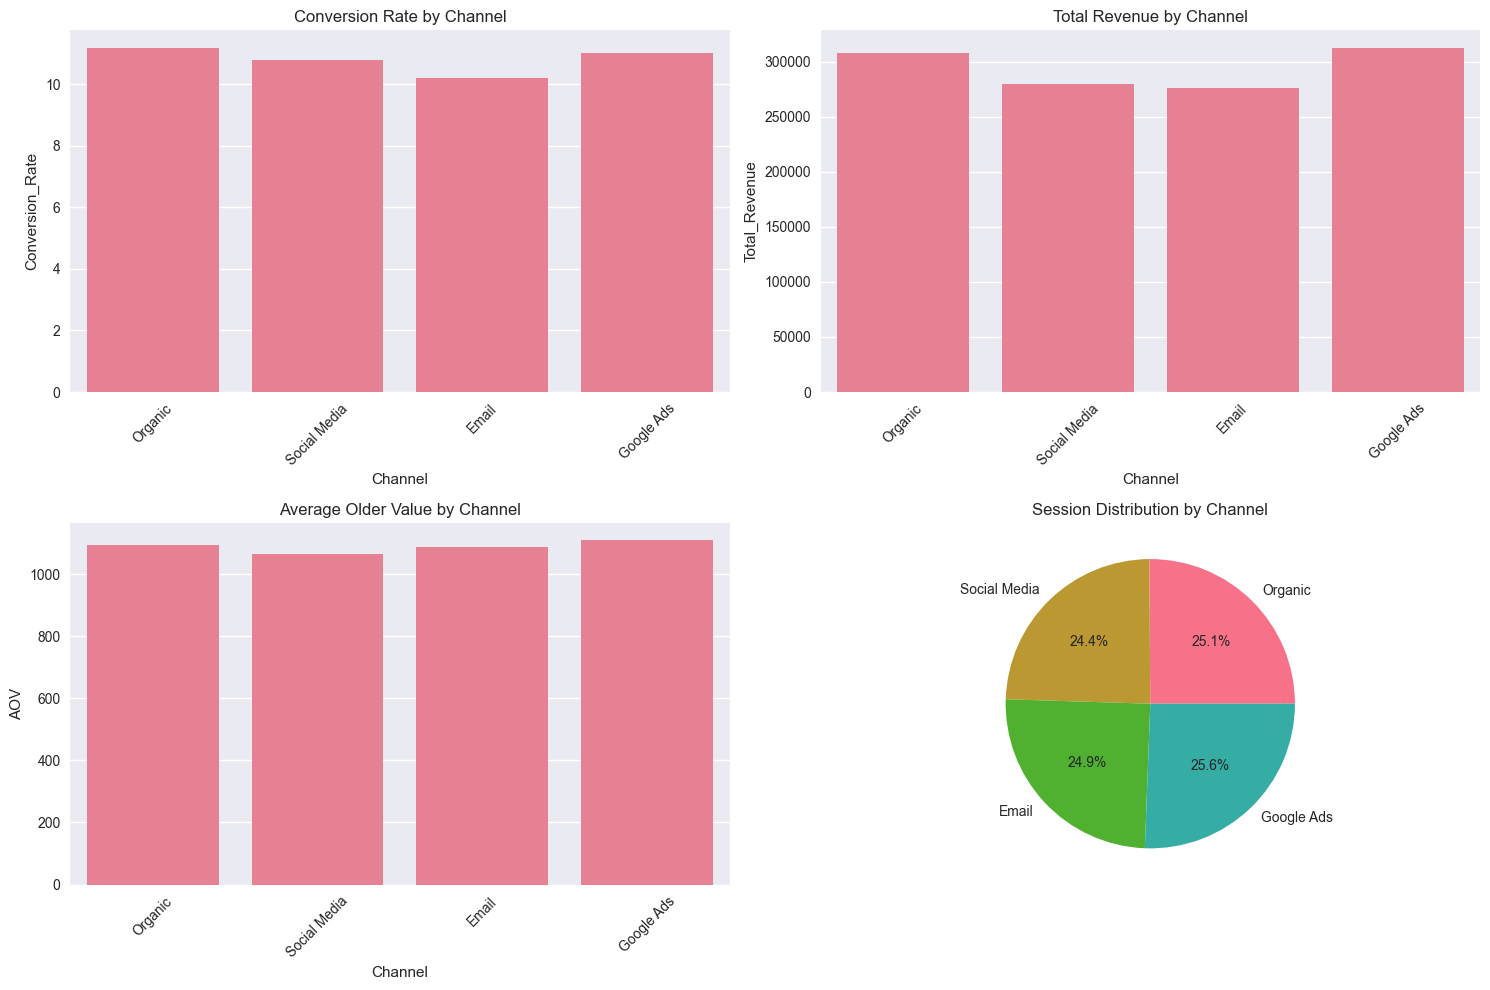

In [79]:
# Funnel analysis by channel
channel_funnel = []

for channel in df['Channel'].unique():
    channel_sessions = session_summary[session_summary['Channel'] == channel]
    total_sessions = len(channel_sessions)

    if total_sessions > 0:
        channel_metrics = {'Channel': channel, 'Total_Sessions': total_sessions}

        for i, stage in enumerate(funnel_stages):
            if i == 0:
                count = total_sessions
            else:
                count = len(channel_sessions[channel_sessions['Max_Funnel_Stage'].isin(funnel_stages[i:])])

            channel_metrics[f'{stage}_Sessions'] = count
            channel_metrics[f'{stage}_Rate'] = (count / total_sessions * 100)

        # Revenue metrics
        purchase_sessions = channel_sessions[channel_sessions['Max_Funnel_Stage'] == 'Purchase']
        channel_metrics['Total_Revenue'] = purchase_sessions['Revenue'].sum()
        channel_metrics['AOV'] = purchase_sessions['Revenue'].mean() if len(purchase_sessions) > 0 else 0
        channel_metrics['Conversion_Rate'] = (len(purchase_sessions) / total_sessions * 100)

        channel_funnel.append(channel_metrics)

channel_df = pd.DataFrame(channel_funnel)

print("📊 Channel Performance Analysis:")
display(channel_df.round(2))

# Visualizing channel performance
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15, 10))

# Conversion rates by channel
sns.barplot(data = channel_df, x = 'Channel', y = 'Conversion_Rate', ax = ax1)
ax1.set_title('Conversion Rate by Channel')
ax1.tick_params(axis = 'x', rotation = 45)

# Total revenue by channel
sns.barplot(data = channel_df, x = 'Channel', y = "Total_Revenue", ax = ax2)
ax2.set_title('Total Revenue by Channel')
ax2.tick_params(axis = 'x', rotation = 45)

# Average Older Value by channel
sns.barplot(data = channel_df, x = 'Channel', y = "AOV", ax = ax3)
ax3.set_title('Average Older Value by Channel')
ax3.tick_params(axis = 'x', rotation = 45)

# Session distribution by channel
channel_df['Session_Percentage'] = (channel_df['Total_Sessions'] / channel_df['Total_Sessions'].sum() * 100)
ax4.pie(channel_df['Session_Percentage'], labels = channel_df['Channel'], autopct = '%1.1f%%')
ax4.set_title('Session Distribution by Channel')

plt.tight_layout()
plt.show()

## Regional Analysis

🌏 Regional Performance:


,Total_Sessions,Total_Revenue,Session_Duration_Min,Converted_Sessions,Converted_Rate,AOV
Region,,,,,,
East,2514,301767.14,4.146778,280,11.14,120.03
North,2504,288027.95,3.998003,261,10.42,115.03
South,2506,311018.57,4.102155,282,11.25,124.11
West,2476,275592.12,4.080775,257,10.38,111.31


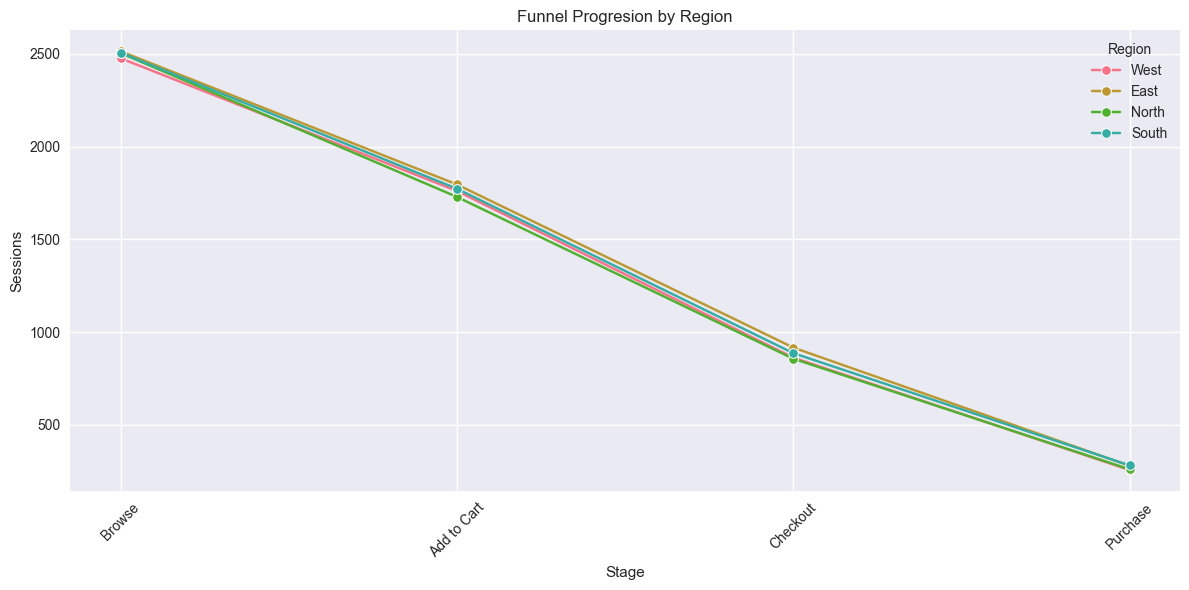

In [81]:
# Regional performance analysis
regional_analysis = session_summary.groupby('Region').agg({
    'Session_ID': 'count',
    'Revenue': 'sum',
    'Session_Duration_Min': 'mean'
}).rename(columns = {'Session_ID': 'Total_Sessions', 'Revenue': 'Total_Revenue'})

# Add conversion rates by region
regional_conversion = session_summary[session_summary['Max_Funnel_Stage'] == 'Purchase'].groupby('Region').size()
regional_analysis['Converted_Sessions'] = regional_conversion
regional_analysis['Converted_Rate'] = (regional_analysis['Converted_Sessions'] / regional_analysis['Total_Sessions'] * 100).round(2)
regional_analysis['AOV'] = (regional_analysis['Total_Revenue'] / regional_analysis['Total_Sessions']).round(2)

print("🌏 Regional Performance:")
display(regional_analysis)

# Regional funnel visualization
regional_funnel_data = []
for region in df['Region'].unique():
    region_sessions = session_summary[session_summary['Region'] == region]
    for stage in funnel_stages:
        if stage == 'Browse':
            count = len(region_sessions)
        else: 
            count = len(region_sessions[region_sessions['Max_Funnel_Stage'].isin(funnel_stages[funnel_stages.index(stage):])])
        regional_funnel_data.append({'Region': region, 'Stage': stage, 'Sessions': count})

regional_funnel_df = pd.DataFrame(regional_funnel_data)

plt.figure(figsize = (12, 6))
sns.lineplot(data = regional_funnel_df, x = 'Stage', y = 'Sessions', hue = 'Region', marker = 'o')
plt.title('Funnel Progresion by Region')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()